# Explore here

In [8]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=UserWarning)

In [2]:
#Importing the data
url='https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv'
df = pd.read_csv(url)
#df.to_csv('../data/raw/medical_insurance_cost.csv', index=False)

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
#Checking for duplicates
df.duplicated().sum()

1

In [6]:
df.drop_duplicates(inplace=True)

In [7]:
#Categorical variables
cat_variables = df.describe(include=['O'])
cat_variables

,sex,smoker,region
count,1337,1337,1337
unique,2,2,4
top,male,no,southeast
freq,675,1063,364


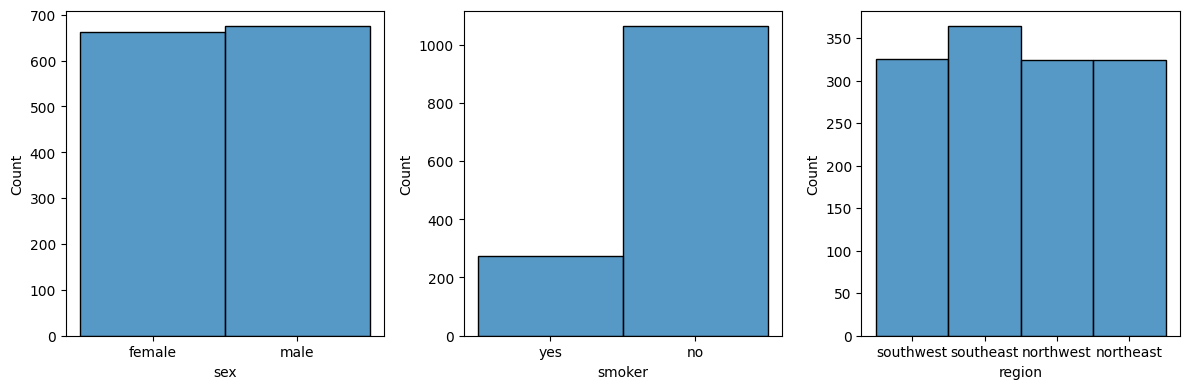

In [10]:
fig, axs = plt.subplots(1,3, figsize=(12,4))

sns.histplot(ax=axs[0],data=df, x=df['sex'])
sns.histplot(ax=axs[1], data=df, x=df['smoker'])
sns.histplot(ax=axs[2], data=df, x=df['region'])

plt.tight_layout()
plt.show()


In [11]:
#Numerical variables
num_variables = df.describe()
num_variables

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


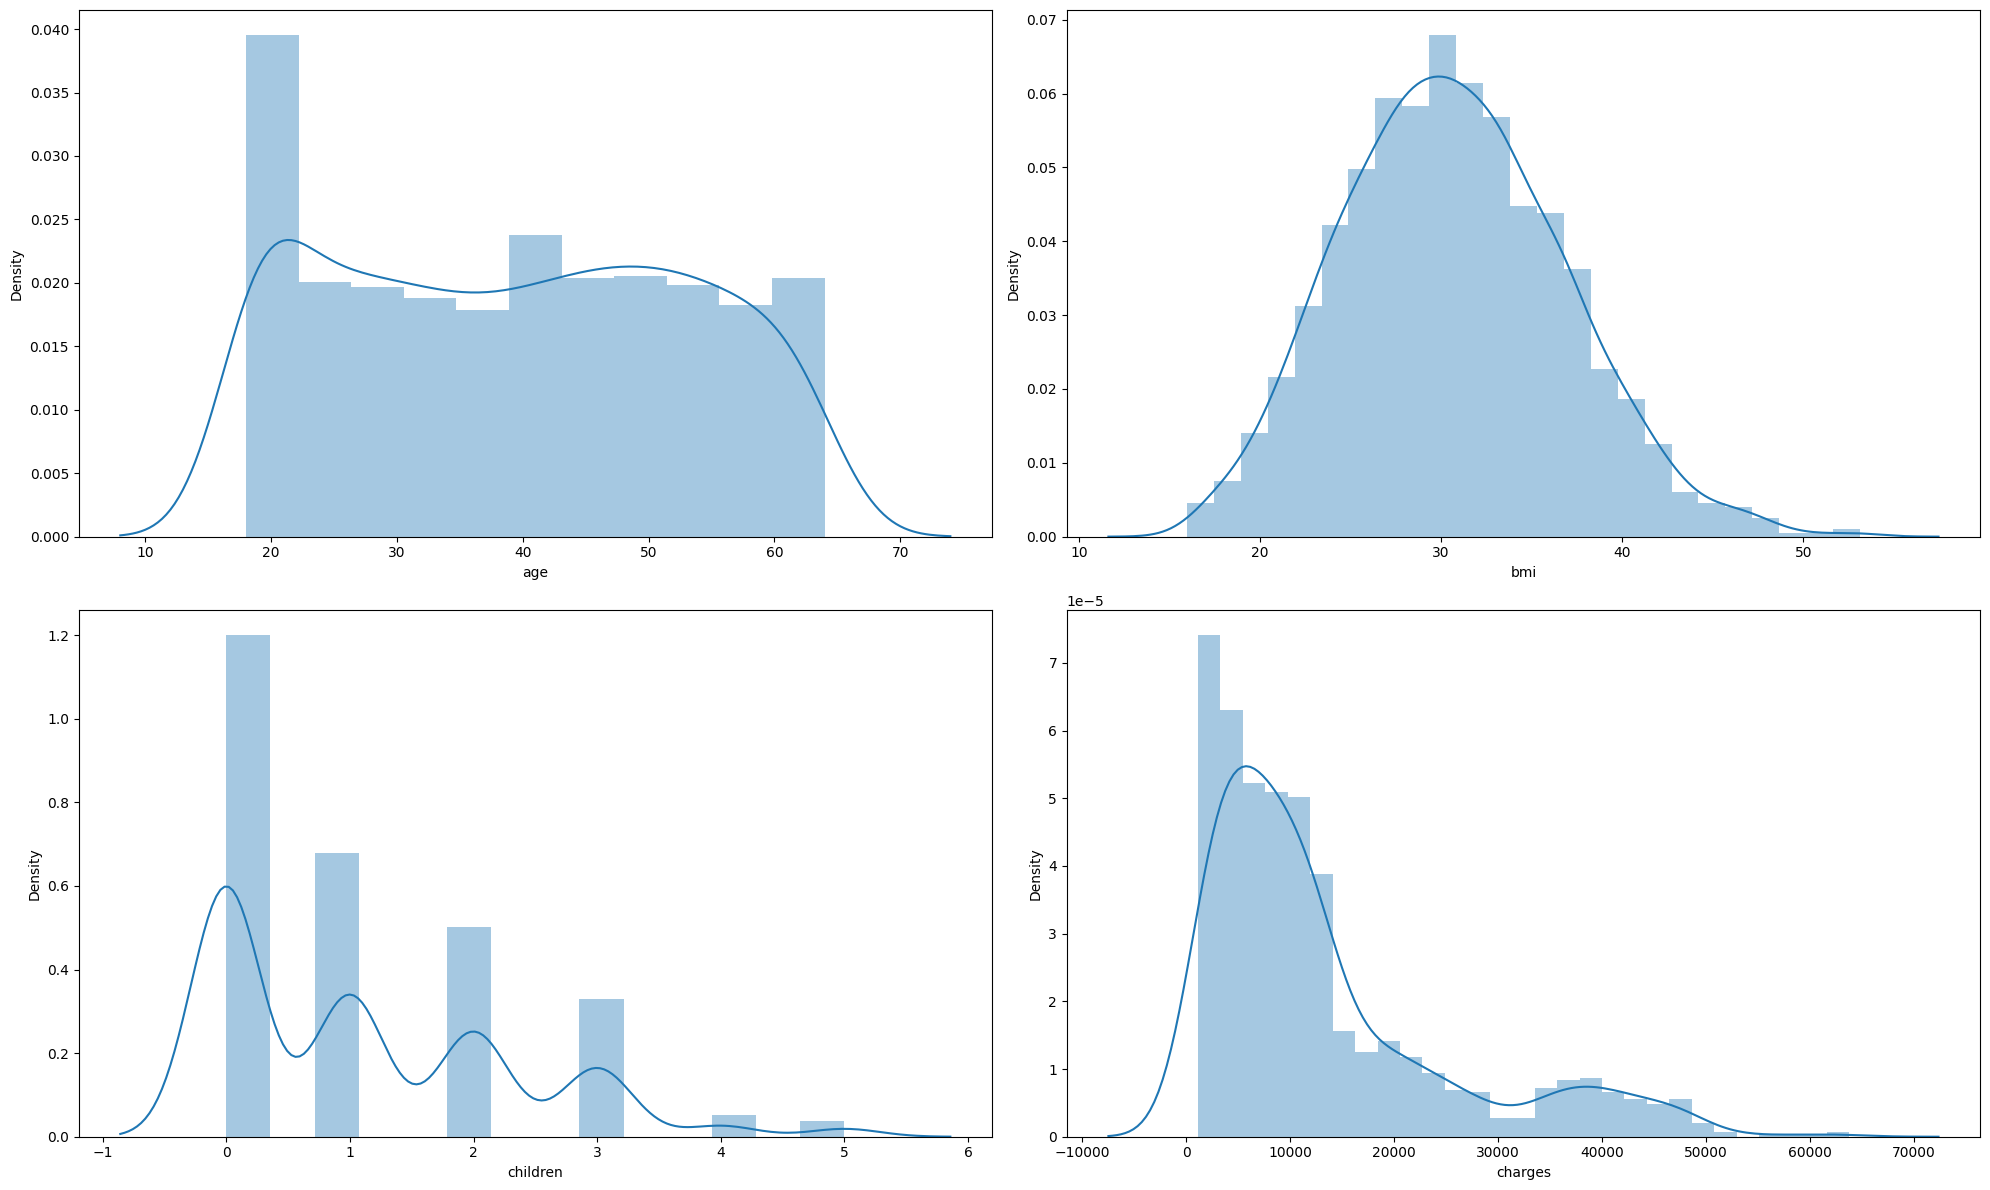

In [12]:
col_n_list = [i for i in num_variables.columns]

num_plots = len(col_n_list)
total_cols = 2
total_rows = num_plots//total_cols
fig, axs = plt.subplots(nrows=total_rows, ncols=total_cols,figsize=(10*total_cols, 6*total_rows), constrained_layout=True)

index = 0
for col in col_n_list:

    row = index //total_cols
    pos = index % total_cols
    sns.distplot(df[col], kde=True, rug = False, ax=axs[row][pos])
    
    index += 1
plt.tight_layout()
plt.show()

In [13]:
df_encoded = df.copy()
df_encoded['sex'] = pd.factorize(df_encoded['sex'])[0]
df_encoded['smoker'] = pd.factorize(df_encoded['smoker'])[0]
df_encoded['region'] = pd.factorize(df_encoded['region'])[0]

In [14]:
#Normalisation
scaler = MinMaxScaler()
df_encoded[['age', 'bmi', 'children', 'charges']] = scaler.fit_transform(df_encoded[['age', 'bmi', 'children', 'charges']])

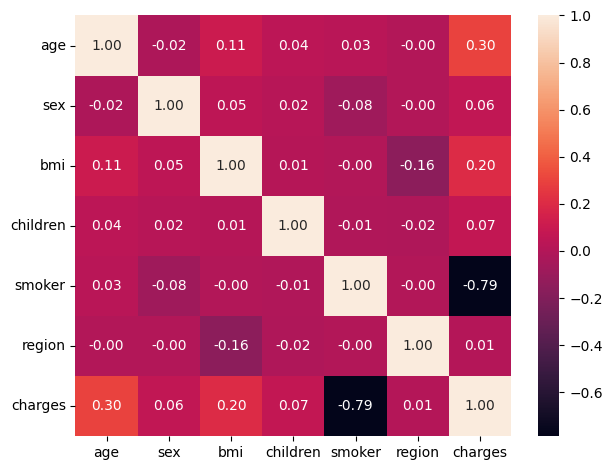

In [16]:
sns.heatmap(df_encoded.corr(), annot=True, fmt=".2f")
plt.tight_layout()
plt.show()

In [ ]:
fig, axis=plt.subplots(1,3, figsize=(10,7))

sns.regplot(ax = axis[0], data = df_encoded, x = "smoker", y = "charges")
sns.regplot(ax = axis[1], data = df_encoded, x = "age", y = "charges")
sns.regplot(ax = axis[2], data = df_encoded, x = "bmi", y = "charges")

plt.tight_layout()
plt.show()

In [17]:
#Data split
X = df_encoded.drop('charges', axis=1)
y = df_encoded['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
print('Variables:', X_train.shape, X_test.shape)
print('Targets:', y_train.shape, y_test.shape)

Variables: (1069, 6) (268, 6)
Targets: (1069,) (268,)


**Linear Regression**

In [21]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [23]:
y_pred = model.predict(X_test)
y_pred

array([ 0.11107321,  0.07136633,  0.21159985,  0.4885978 ,  0.12827883,
        0.1953619 ,  0.4650671 ,  0.00298129,  0.15527176,  0.16366977,
        0.14941043,  0.51132843,  0.47551792,  0.25614271,  0.15186728,
        0.13172488,  0.04538604,  0.49164921,  0.0313305 ,  0.06949194,
        0.0422447 ,  0.46343277,  0.22275094,  0.46533839,  0.47824218,
        0.07020344,  0.55138865,  0.56265373,  0.16243162,  0.20662249,
        0.0838539 ,  0.18861147, -0.00706463,  0.17280237,  0.61711555,
        0.17605964,  0.05515378,  0.04620457,  0.47927158,  0.1293109 ,
        0.09172841,  0.46152601,  0.54033827,  0.17636648,  0.1012115 ,
        0.03429084,  0.07821545,  0.12283684,  0.05107612,  0.12985632,
        0.09106233,  0.17186162,  0.47907249,  0.04230001,  0.1552407 ,
        0.14147695,  0.1536126 ,  0.02209835,  0.48248129,  0.13285859,
        0.23376452,  0.11636993,  0.18381706,  0.0059923 ,  0.24947555,
        0.15176155,  0.1484482 ,  0.47020092,  0.37440304,  0.24

In [29]:
#Mean Squared Error, R2 Score
msq=mean_squared_error(y_test, y_pred)
r2=r2_score(y_test, y_pred)
print(f"The MSE of the model is {msq} and the R2 Score is {r2}.")

The MSE of the model is 0.009043194261536824 and the R2 Score is 0.8068466322629111.
